In [1]:
from pycaret.datasets import get_data

In [2]:
#implementing regression using pycaret


In [3]:
#dataset = get_data()
# using PyCaret's data respository to load the data using the get_data() function
import pandas as pd
dataset = pd.read_csv(r"file:///C:\Users\prakruthi\Desktop\web\360digi\Python%20codes\Python%20codes\multi%20linear%20regression\Computer_Data.csv")

In [4]:
dataset.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [5]:
dataset.shape #no. of rows and columns in the dataset

(6259, 11)

In [6]:
dataset.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [7]:
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
dataset.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [9]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
#this is not train or split it is to make some data here i.e 10% of data to be unseen

Data for Modeling: (5633, 10)
Unseen Data For Predictions: (626, 10)


In [10]:
#In order to demonstrate the predict_model() function on unseen data, 
#a sample of 600 records has been withheld from the original dataset to be used for predictions. 
#This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. 
#Another way to think about this is that these 600 records are not available at the time when the machine learning experiment was performed.

In [11]:
#The setup() function initializes the environment in pycaret and 
#creates the transformation pipeline to prepare the data for modeling and deployment.

In [12]:
from pycaret.regression import *


In [13]:
reg = setup(data= data,target='price')

,Description,Value
0,session_id,1552
1,Target,price
2,Original Data,"(5633, 10)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3943, 21)"


In [14]:
dataset['screen'].unique()

array([14, 15, 17], dtype=int64)

In [15]:
#some are wrongly classified datatype so we change manualy
reg = setup(data= data,target='price',categorical_features=['cd', 'multi','premium'])

,Description,Value
0,session_id,5367
1,Target,price
2,Original Data,"(5633, 10)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3943, 21)"


In [16]:
#compare_models() This function trains all models in the model library and scores them using k-fold cross validation for metric evaluationa

In [17]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,107.3976,21975.2779,147.6615,0.9354,0.0694,0.0509,3.1990
xgboost,Extreme Gradient Boosting,110.2672,22559.7389,149.8098,0.9335,0.0704,0.0520,0.8030
lightgbm,Light Gradient Boosting Machine,117.8453,25623.9228,159.7532,0.9244,0.0748,0.0556,0.0730
rf,Random Forest Regressor,123.6998,28530.1394,168.2572,0.9159,0.0779,0.0581,0.3180
et,Extra Trees Regressor,135.8231,34325.9307,184.7950,0.8987,0.0861,0.0639,0.3380
gbr,Gradient Boosting Regressor,146.0581,38021.9095,194.4375,0.8880,0.0909,0.0696,0.1300
dt,Decision Tree Regressor,142.6156,40447.0488,200.4618,0.8806,0.0925,0.0671,0.0170
lr,Linear Regression,192.8775,67084.0633,258.6391,0.8024,0.1207,0.0917,0.6290
lar,Least Angle Regression,192.8767,67083.4868,258.6380,0.8024,0.1207,0.0917,0.0190
br,Bayesian Ridge,192.9331,67098.3878,258.6688,0.8023,0.1207,0.0917,0.0170


In [18]:
#by default compare_models() take 10 for k in k fold ,as it is the default and we can change it accordingly

In [19]:
#There are 25 regressors available in the model library of PyCaret.

In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [21]:
#we can seperately check for change in regression evaluation metrics for every fold

In [22]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,113.1789,20825.8739,144.3117,0.9307,0.0742,0.0558
1,120.7609,32759.6421,180.9962,0.9141,0.0792,0.0562
2,120.9679,26069.9606,161.4619,0.9244,0.0773,0.0579
3,111.2212,21908.3905,148.0148,0.9369,0.0712,0.0526
4,119.9769,25892.8584,160.9126,0.9222,0.0745,0.0563
5,117.4918,25888.8715,160.9002,0.9315,0.0742,0.0544
6,116.4780,22572.7670,150.2424,0.9276,0.0713,0.0544
7,116.4671,24792.6867,157.4569,0.9323,0.0714,0.0544
8,121.7761,28303.2563,168.2357,0.9090,0.0809,0.0589
9,120.1339,27224.9214,164.9998,0.9157,0.0737,0.0551


In [23]:
dt = create_model('dt')  #decison trees

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,142.9180,34202.2081,184.9384,0.8862,0.0921,0.0700
1,158.3489,52084.8205,228.2210,0.8634,0.1005,0.0732
2,139.8329,39668.8876,199.1705,0.8849,0.0949,0.0672
3,122.5154,27978.3530,167.2673,0.9194,0.0798,0.0576
4,147.4059,44108.1048,210.0193,0.8675,0.0942,0.0686
5,146.2125,45219.0274,212.6477,0.8803,0.0958,0.0676
6,141.1723,38399.8112,195.9587,0.8769,0.0868,0.0650
7,136.7653,36642.4783,191.4223,0.8999,0.0893,0.0653
8,148.7560,45455.2663,213.2024,0.8539,0.0998,0.0698
9,142.2290,40711.5309,201.7710,0.8740,0.0922,0.0667


In [24]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,268.4079,103234.6567,321.3015,0.6566,0.1617,0.1386
1,283.0706,123371.8953,351.2434,0.6765,0.1660,0.1412
2,294.1215,124003.7750,352.1417,0.6404,0.1713,0.1485
3,276.9309,108888.2759,329.9822,0.6862,0.1624,0.1406
4,267.0816,109358.9444,330.6946,0.6714,0.1575,0.1322
5,284.3728,123063.0687,350.8035,0.6744,0.1699,0.1421
6,270.7721,104734.8671,323.6277,0.6642,0.1530,0.1325
7,291.8483,130175.1935,360.7980,0.6444,0.1682,0.1439
8,281.6357,117858.0070,343.3045,0.6211,0.1687,0.1434
9,290.4913,118657.1515,344.4665,0.6327,0.1616,0.1416


In [25]:
#Tune a Model

In [26]:
#AdaBoost Regressor

In [27]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,256.6953,95774.0174,309.4738,0.6814,0.1562,0.1323
1,282.2621,123275.2451,351.1057,0.6768,0.1626,0.1394
2,292.6607,125099.8683,353.6946,0.6372,0.1701,0.1467
3,264.9643,102215.7408,319.7120,0.7054,0.1557,0.1334
4,265.3315,106577.4563,326.4620,0.6798,0.1545,0.1302
5,283.7144,122231.8254,349.6167,0.6766,0.1679,0.1414
6,272.3539,108434.9991,329.2947,0.6524,0.1555,0.1336
7,291.6112,126366.3272,355.4804,0.6548,0.1647,0.1426
8,280.2698,116977.0301,342.0190,0.6239,0.1676,0.1425
9,283.1986,114175.7726,337.8991,0.6466,0.1578,0.1374


In [28]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.286, loss='exponential',
                  n_estimators=190, random_state=5367)


In [29]:
#Light Gradient Boosting Machine

In [30]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [31]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)  
#then considering default values we can use custom grid 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,108.7681,19955.8347,141.2651,0.9336,0.0721,0.0536
1,119.7070,31636.3911,177.8662,0.9171,0.0783,0.0559
2,117.8150,25211.5262,158.7814,0.9269,0.0766,0.0567
3,105.6854,19798.4971,140.7071,0.9429,0.0686,0.0499
4,116.9914,25379.0064,159.3079,0.9237,0.0731,0.0547
5,117.8831,25182.5288,158.6900,0.9334,0.0748,0.0551
6,113.5833,21912.1196,148.0274,0.9298,0.0697,0.0531
7,112.8235,22800.1788,150.9973,0.9377,0.0705,0.0532
8,121.1980,28922.3895,170.0658,0.9070,0.0806,0.0578
9,110.5615,23628.8061,153.7166,0.9269,0.0700,0.0516


In [32]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.30000000000000004,
              max_depth=10, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=130,
              objective=None, random_state=5367, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [33]:
#the plot_model() function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. 
#This function takes a trained model object and returns a plot based on the test / hold-out set.
#there are 10 plots available

In [34]:
''' * 'residuals' - Residuals Plot
    * 'error' - Prediction Error Plot
    * 'cooks' - Cooks Distance Plot
    * 'rfe' - Recursive Feat. Selection
    * 'learning' - Learning Curve
    * 'vc' - Validation Curve
    * 'manifold' - Manifold Learning
    * 'feature' - Feature Importance
    * 'feature_all' - Feature Importance (All)
    * 'parameter' - Model Hyperparameter
    * 'tree' - Decision Tree
'''

" * 'residuals' - Residuals Plot\n    * 'error' - Prediction Error Plot\n    * 'cooks' - Cooks Distance Plot\n    * 'rfe' - Recursive Feat. Selection\n    * 'learning' - Learning Curve\n    * 'vc' - Validation Curve\n    * 'manifold' - Manifold Learning\n    * 'feature' - Feature Importance\n    * 'feature_all' - Feature Importance (All)\n    * 'parameter' - Model Hyperparameter\n    * 'tree' - Decision Tree\n"

In [35]:
#Residual Plot

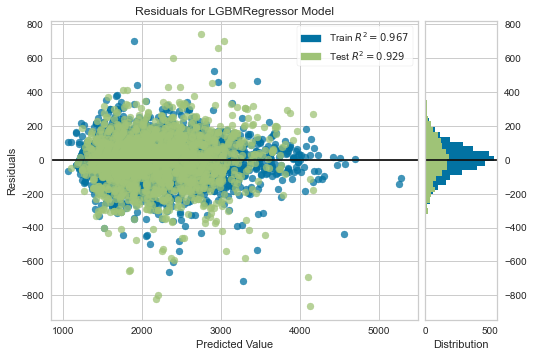

In [36]:
plot_model(tuned_lightgbm)

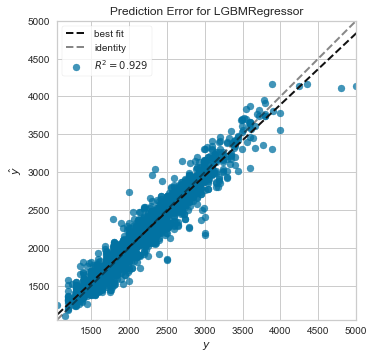

In [37]:
plot_model(tuned_lightgbm,plot='error')

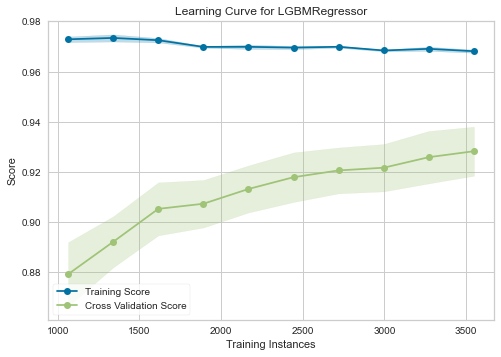

In [38]:
plot_model(tuned_lightgbm,plot='learning')

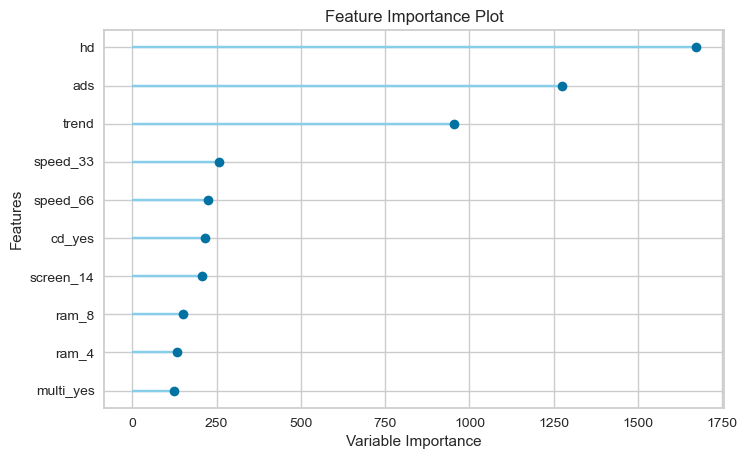

In [39]:
plot_model(tuned_lightgbm,plot='feature')

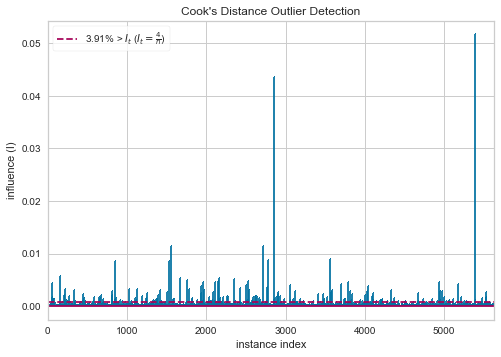

In [40]:
plot_model(tuned_lightgbm,plot='cooks')

In [41]:
evaluate_model(tuned_lightgbm)
#it evaluates on every models and has plot_models internally

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
# Predict on Test / Hold-out Sample

In [43]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,111.5847,22937.5842,151.4516,0.9295,0.0698,0.0521


,hd,ads,trend,speed_100,speed_25,speed_33,speed_50,speed_66,speed_75,ram_16,...,ram_4,ram_8,screen_14,screen_15,screen_17,cd_yes,multi_yes,premium_yes,price,Label
0,528.0,163.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1740.0,1752.259236
1,425.0,248.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2059.0,1823.070859
2,120.0,283.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2299.0,2242.436906
3,212.0,246.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1599.0,1642.218762
4,170.0,100.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2055.0,2200.084668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,320.0,216.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2799.0,2827.081832
1686,340.0,152.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1395.0,1450.070766
1687,426.0,273.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1890.0,1963.508995
1688,425.0,182.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1799.0,1801.455385


In [44]:
#The R2 on the test/hold-out set is 0.92 compared to 0.9305 achieved on tuned_lightgbm CV results.
#This is not a significant difference
#If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting

In [45]:
#Finalize Model for Deployment

In [46]:
#The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). 
#The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [47]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [48]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.30000000000000004,
              max_depth=10, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=130,
              objective=None, random_state=5367, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [49]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,79.6712,11662.8847,107.9948,0.9641,0.0518,0.0378


In [50]:
#we can see the R2 has increased from .92 to .96 as we used all of the data along with hold out/test to train the model

In [51]:
#predict on unseen predictions

In [52]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend,Label
0,3695,66,340,16,14,no,no,yes,94,1,3395.160351
1,1995,50,85,2,14,no,no,yes,94,1,1866.425554
2,2605,66,210,8,14,no,no,yes,94,1,2468.640634
3,2295,25,245,8,14,no,no,yes,94,1,2533.580389
4,2095,33,250,4,15,no,no,yes,94,1,2363.813492


In [53]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.Label, 'R2')

0.9448

In [54]:
#Saving the Model

In [55]:
save_model(final_lightgbm,'Final Lightgbm Model 21Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['cd', 'multi',
                                                             'premium'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.30000000000000004, max_depth=10,
                                min_child_samples=2

In [56]:
saved_final_lightgbm = load_model('Final Lightgbm Model 21Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [57]:
#for classification

In [58]:
clf = get_data("hepatitis")

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [59]:
data = clf.sample(frac=0.9, random_state=786)
data_unseen = clf.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
#this is not train or split it is to make some data here i.e 10% of data to be unseen

Data for Modeling: (139, 20)
Unseen Data For Predictions: (15, 20)


In [60]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'Class', categorical_features = ['AGE'])
 


,Description,Value
0,session_id,5024
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(139, 20)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
clf.isna().sum()  #checking for na values

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [62]:
cl = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8378,0.8598,0.5000,0.6750,0.5500,0.4738,0.4915,4.4600
lr,Logistic Regression,0.8356,0.7815,0.5833,0.7167,0.6200,0.5192,0.5369,0.0710
rf,Random Forest Classifier,0.8256,0.8499,0.5333,0.6167,0.5533,0.4577,0.4702,0.1330
xgboost,Extreme Gradient Boosting,0.8178,0.8146,0.5000,0.5083,0.4900,0.4115,0.4144,0.1000
ridge,Ridge Classifier,0.8044,0.0000,0.4833,0.6500,0.5267,0.4074,0.4323,0.0170
et,Extra Trees Classifier,0.8044,0.7933,0.4333,0.5333,0.4633,0.3585,0.3688,0.1340
ada,Ada Boost Classifier,0.7944,0.7062,0.5500,0.5167,0.4967,0.4041,0.4266,0.0460
knn,K Neighbors Classifier,0.7833,0.6793,0.2000,0.3500,0.2500,0.1791,0.1931,0.0220
lightgbm,Light Gradient Boosting Machine,0.7744,0.7908,0.4833,0.4833,0.4667,0.3403,0.3462,0.0370
gbc,Gradient Boosting Classifier,0.7733,0.8065,0.4500,0.4750,0.4367,0.3166,0.3275,0.0470


In [63]:
cgbc = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.8125,0.5000,1.0000,0.6667,0.6154,0.6667
1,0.9000,0.5000,0.5000,1.0000,0.6667,0.6154,0.6667
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.8750,0.5000,1.0000,0.6667,0.6154,0.6667
4,0.7000,0.7500,0.5000,0.3333,0.4000,0.2105,0.2182
5,0.7000,0.6875,0.5000,0.3333,0.4000,0.2105,0.2182
6,0.7000,0.6190,0.3333,0.5000,0.4000,0.2105,0.2182
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7778,0.6429,0.5000,0.5000,0.5000,0.3571,0.3571
9,0.7778,0.9286,0.5000,0.5000,0.5000,0.3571,0.3571


In [64]:
tune = tune_model(cgbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.8125,0.5000,1.0000,0.6667,0.6154,0.6667
1,0.9000,0.5000,0.5000,1.0000,0.6667,0.6154,0.6667
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.8125,0.5000,1.0000,0.6667,0.6154,0.6667
4,0.6000,0.6875,0.0000,0.0000,0.0000,-0.2500,-0.2500
5,0.7000,0.6875,0.5000,0.3333,0.4000,0.2105,0.2182
6,0.7000,0.5714,0.3333,0.5000,0.4000,0.2105,0.2182
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7778,0.6429,0.5000,0.5000,0.5000,0.3571,0.3571
9,0.7778,0.9286,0.5000,0.5000,0.5000,0.3571,0.3571


In [65]:
cgbc.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

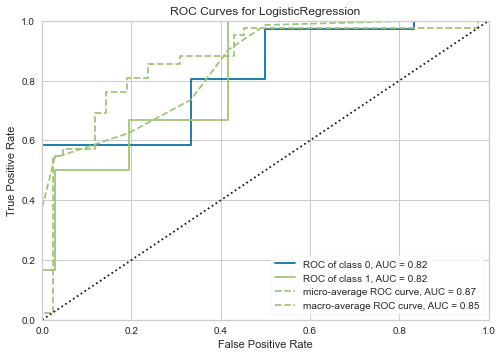

In [66]:
plot_model(tune)

In [67]:
evaluate_model(tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [68]:
final_lightgbm = finalize_model(tune)

In [69]:
print(final_lightgbm)

LogisticRegression(C=1.927, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5024, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [70]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9048,0.9398,0.5000,0.7500,0.6000,0.5484,0.5629


In [72]:
#Notice how the R2 in the final_lightgbm has increased to 0.92 from 0.82, even though the model is same

In [73]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,...,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Label,Score
0,0,34,1,2.0,2,2,2,2,2.0,2.0,...,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1,0,0.9823
1,0,22,2,2.0,1,1,2,2,2.0,2.0,...,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1,0,0.9937
2,0,42,1,2.0,2,2,2,2,2.0,2.0,...,2.0,2.0,0.9,60.0,63.0,4.7,47.0,1,0,0.9848
3,1,39,1,1.0,1,1,1,2,2.0,1.0,...,2.0,2.0,2.3,280.0,98.0,3.8,40.0,1,0,0.9680
4,0,44,1,2.0,2,2,2,2,2.0,2.0,...,2.0,2.0,0.6,110.0,145.0,4.4,70.0,1,0,0.9914
